```
This software is a part of GPU Ocean.

Copyright (C) 2019  SINTEF Digital

This notebook is used to make figures that illustrates the double jet case used in the results section of the IEWPF paper.

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
```

# Example of Double Jet Case

This notebook is used to make figures that illustrates the double jet case used in the results section of the IEWPF paper.

## Set environment

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc

import pycuda.driver as cuda
import os
import sys
import datetime

from importlib import reload

#Set large figure sizes
rc('figure', figsize=(16.0, 12.0))
rc('animation', html='html5')

#Import our simulator
from gpuocean.SWEsimulators import CDKLM16
from gpuocean.utils import IPythonMagic, DoubleJetCase

In [2]:
%cuda_context_handler gpu_ctx

In [11]:
cuda.Device(0).name()

'Quadro P2000'

In [3]:
#Create output directory for images
imgdir = 'double_jet'
filename_prefix = imgdir + "/" + datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S") + "_"
os.makedirs(imgdir, exist_ok=True)
print("Saving images to " + imgdir)

Saving images to double_jet


In [4]:
def imshow(im, interpolation="None", title=None, figsize=(4,4), interior=False):
    fig = plt.figure(figsize=figsize)
    
    if interior:
        im = plt.imshow(im[2:-2,2:-2], interpolation=interpolation, origin='lower')
    else:
        im = plt.imshow(im, interpolation=interpolation, origin='lower')
    
    plt.colorbar()
    if title is not None:
        plt.title(title)
        
def imshow3(eta, hu, hv, interpolation="None", title=None, figsize=(12,3), interior=False):
    fig, axs = plt.subplots(1,3, figsize=figsize)
    
    range_eta = np.max(np.abs(eta))
    range_huv = max(np.max(np.abs(hu)), np.max(np.abs(hv)))
    
    if interior:
        eta_im = axs[0].imshow(eta[2:-2,2:-2], interpolation=interpolation, origin='lower', vmin=-range_eta, vmax=range_eta)
    else:
        eta_im = axs[0].imshow(eta, interpolation=interpolation, origin='lower', vmin=-range_eta, vmax=range_eta)
    axs[0].set_title("$\eta$")
    plt.colorbar(eta_im, ax=axs[0])
    
    if interior:
        hu_im = axs[1].imshow(hu[2:-2,2:-2], interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    else:
        hu_im = axs[1].imshow(hu, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[1].set_title("$hu$")
    plt.colorbar(hu_im, ax=axs[1])

    if interior:
        hv_im = axs[2].imshow(hv[2:-2,2:-2], interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    else:
        hv_im = axs[2].imshow(hv, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[2].set_title("$hv$")
    plt.colorbar(hv_im, ax=axs[2])

    if title is not None:
        plt.suptitle(title)
    plt.tight_layout()

def imshow6(eta1, hu1, hv1, eta2, hu2, hv2, interpolation="None", title=None):
    fig, axs = plt.subplots(3,3, figsize=(12,13))
    
    range_eta = max(np.max(np.abs(eta1)), np.max(np.abs(eta2)))
    range_huv = max(np.max(np.abs(hu1)), np.max(np.abs(hu2)), np.max(np.abs(hv1)), np.max(np.abs(hv2)))
    
    eta_im = axs[0,0].imshow(eta1, interpolation=interpolation, origin='lower', vmin=-range_eta, vmax=range_eta)
    axs[0,0].set_title("eta 1")
    plt.colorbar(eta_im, ax=axs[0,0])
    
    hu_im = axs[0,1].imshow(hu1, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[0,1].set_title("hu 1")
    plt.colorbar(hu_im, ax=axs[0,1])

    hv_im = axs[0,2].imshow(hv1, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[0,2].set_title("hv 1")
    plt.colorbar(hv_im, ax=axs[0,2])

    
    eta_im2 = axs[1,0].imshow(eta2, interpolation=interpolation, origin='lower', vmin=-range_eta, vmax=range_eta)
    axs[1,0].set_title("eta 2")
    plt.colorbar(eta_im, ax=axs[1,0])
    
    hu_im2 = axs[1,1].imshow(hu2, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[1,1].set_title("hu 2")
    plt.colorbar(hu_im, ax=axs[1,1])

    hv_im2 = axs[1,2].imshow(hv2, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[1,2].set_title("hv 2")
    plt.colorbar(hv_im, ax=axs[1,2])
    
    
    eta_im3 = axs[2,0].imshow(eta1 - eta2, interpolation=interpolation, origin='lower', vmin=-range_eta, vmax=range_eta)
    axs[2,0].set_title("diff eta")
    plt.colorbar(eta_im, ax=axs[2,0])
    
    hu_im3 = axs[2,1].imshow(hu1 - hu2, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[2,1].set_title("diff hu")
    plt.colorbar(hu_im, ax=axs[2,1])

    hv_im3 = axs[2,2].imshow(hv1 - hv2, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[2,2].set_title("diff hv")
    plt.colorbar(hv_im, ax=axs[2,2])

    if title is not None:
        plt.suptitle(title, fontsize=18)
    plt.tight_layout()   

# Creating a CDKLM simulator with the steady-state initial condition


In [5]:
save = False

In [6]:
def daysToSec(days):
    return days*24*60*60
def secToDays(sec):
    return round(sec/(24*60*60), 1)

C:\Users\havardh\playground-win\gpuocean\havahol-gpuocean\src\gpuocean\SWEsimulators\CDKLM16.py:214: UserWarning: The CUDA compiler succeeded, but said the following:
kernel.cu

  jit_compile_args={


300 300
(2220.0, 666000.0) (1110.0, 1110.0)


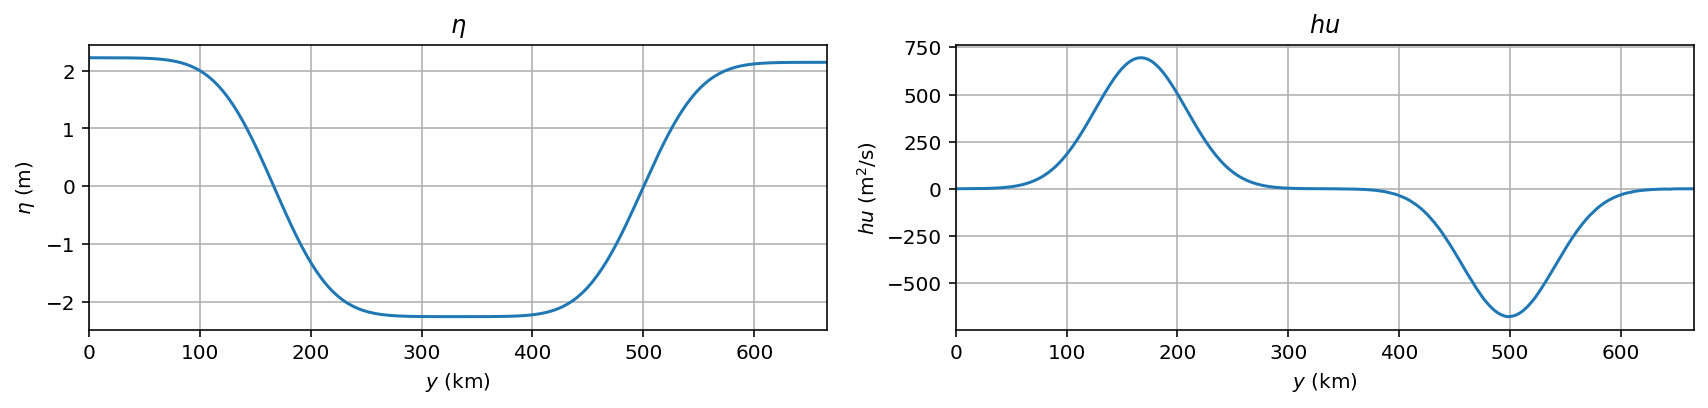

In [7]:
from importlib import reload

reload(CDKLM16)

steadyStateCase = DoubleJetCase.DoubleJetCase(gpu_ctx, model_error=0)
steadyStateCase_args, steadyStateCase_init, model_error_args = steadyStateCase.getInitConditions()
steadyStateCase_sim = CDKLM16.CDKLM16(**steadyStateCase_args, **steadyStateCase_init)

eta, hu, hv = steadyStateCase_sim.download(interior_domain_only=True)

dy = steadyStateCase_sim.dy
ny = steadyStateCase_sim.ny
y = np.linspace(dy/2, dy*(ny-0.5), num=ny)
print(len(y), ny)
print((dy, ny*dy), (y[0], ny*dy - y[-1]))
y = y/1000

crossec_eta = eta[:, 20]
crossec_hu = hu[:, 20]

fig, axs = plt.subplots(1,2, figsize=(12,3))

eta_im = axs[0].plot(y, crossec_eta)
axs[0].grid()
axs[0].set_title('$\eta$')
axs[0].set_xlabel('$y$ (km)')
axs[0].set_ylabel('$\eta$ (m)')


hu_im = axs[1].plot(y, crossec_hu)
axs[1].grid()
axs[1].set_title('$hu$')
axs[1].set_xlabel('$y$ (km)')
axs[1].set_ylabel('$hu$ (m$^2$/s)')

for i in range(2):
    axs[i].set_xlim([0,ny*dy/1000])

plt.tight_layout()
if save: plt.savefig(filename_prefix + "initial_state.pdf", format='pdf')



In [8]:
steadyStateCase_args["f"]

0.00014048811587878725

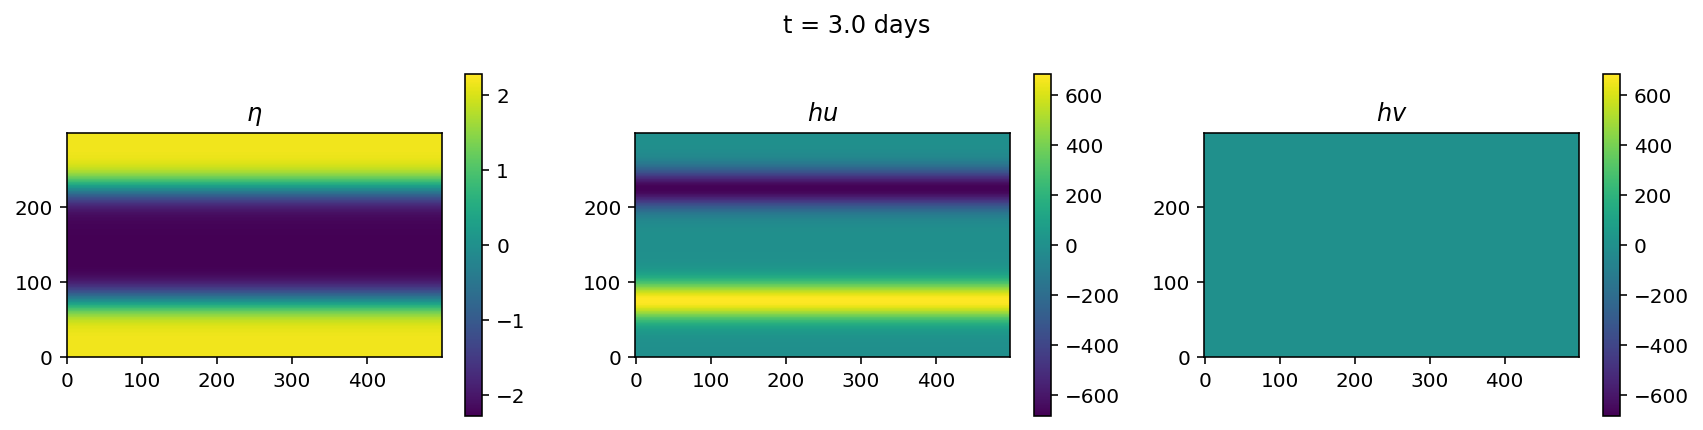

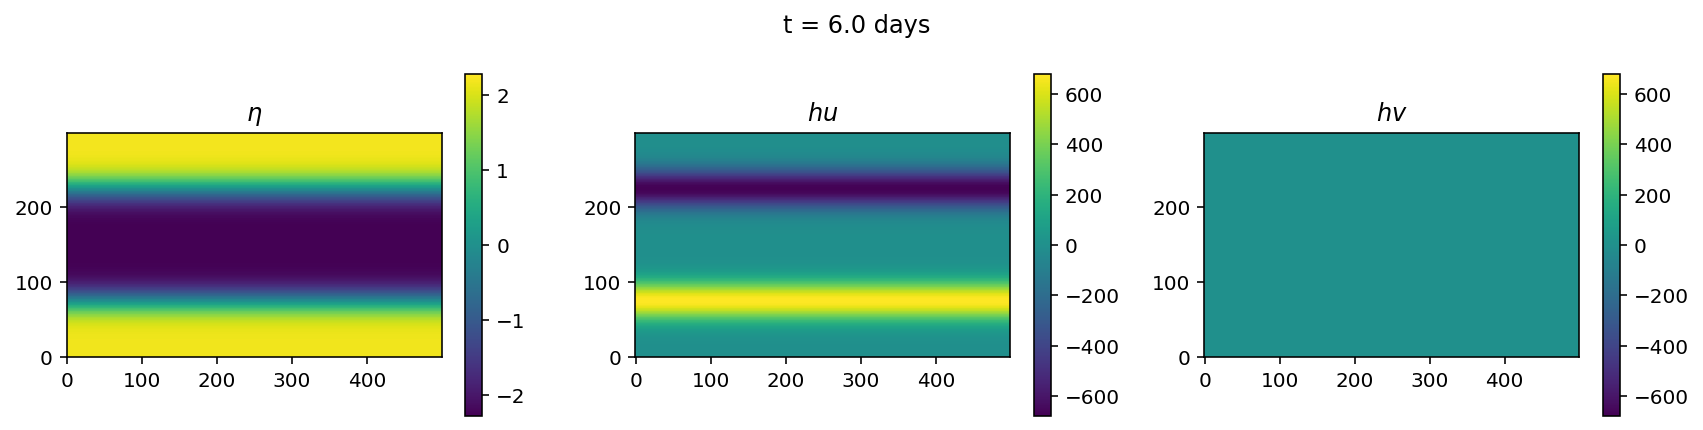

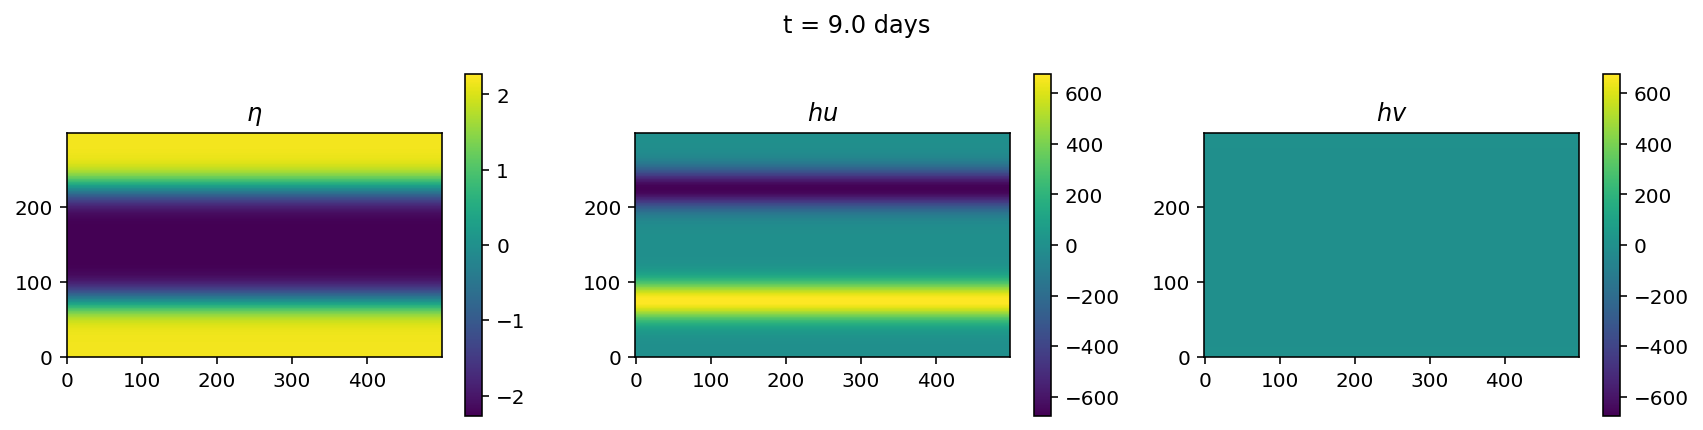

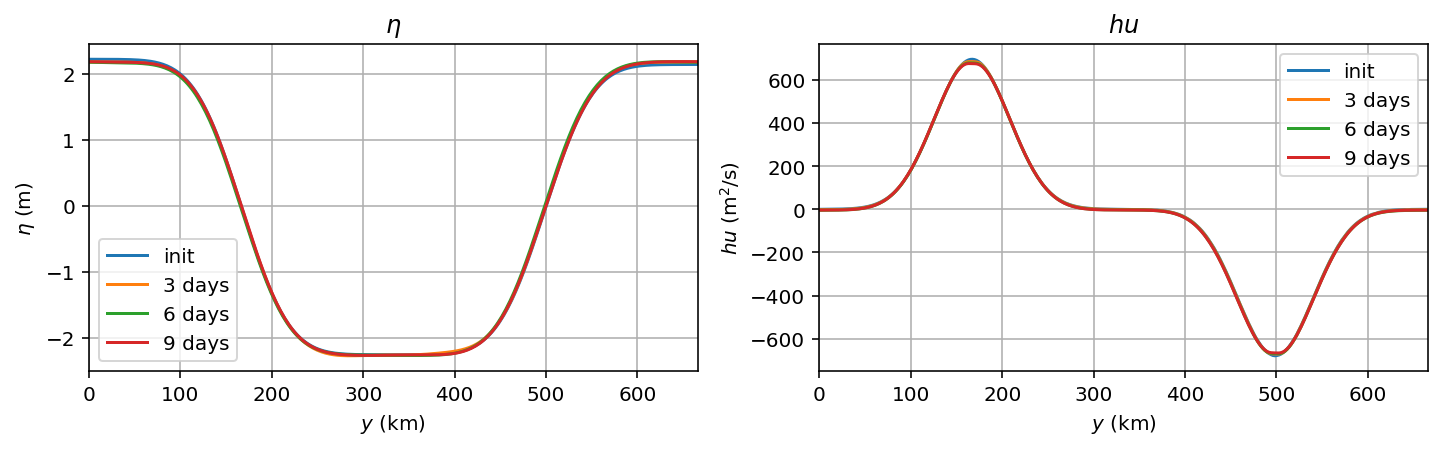

In [9]:

steadyStateCase_sim.step(3*24*60*60)
eta1, hu1, hv1 = steadyStateCase_sim.download(interior_domain_only=True)
imshow3(eta1, hu1, hv1, title='t = ' + str(secToDays(steadyStateCase_sim.t)) + " days")

steadyStateCase_sim.step(3*24*60*60)
eta2, hu2, hv2 = steadyStateCase_sim.download(interior_domain_only=True)
imshow3(eta2, hu2, hv2, title='t = ' + str(secToDays(steadyStateCase_sim.t)) + " days")

steadyStateCase_sim.step(3*24*60*60)
eta3, hu3, hv3 = steadyStateCase_sim.download(interior_domain_only=True)
imshow3(eta3, hu3, hv3, title='t = ' + str(secToDays(steadyStateCase_sim.t)) + " days")

crossec_eta1 = eta1[:, 20]
crossec_hu1 = hu1[:, 20]
crossec_eta2 = eta2[:, 20]
crossec_hu2 = hu2[:, 20]
crossec_eta3 = eta3[:, 20]
crossec_hu3 = hu3[:, 20]
fig, axs = plt.subplots(1,2, figsize=(12,3))

axs[0].plot(y, crossec_eta,  label="init")
axs[0].plot(y, crossec_eta1, label="3 days")
axs[0].plot(y, crossec_eta2, label="6 days")
axs[0].plot(y, crossec_eta3, label="9 days")
axs[0].grid()
axs[0].set_title('$\eta$')
axs[0].set_xlabel('$y$ (km)')
axs[0].set_ylabel('$\eta$ (m)')
axs[0].legend()

axs[1].plot(y, crossec_hu,  label="init")
axs[1].plot(y, crossec_hu1, label="3 days")
axs[1].plot(y, crossec_hu2, label="6 days")
axs[1].plot(y, crossec_hu3, label="9 days")
axs[1].grid()
axs[1].set_title('$hu$')
axs[1].set_xlabel('$y$ (km)')
axs[1].set_ylabel('$hu$ (m$^2$/s)')
axs[1].legend()


for i in range(2):
    axs[i].set_xlim([0,ny*dy/1000])



# Instability after long time with perturbations

t: 259200.0
In days: 3.0 days
Wall time: 40.1 s


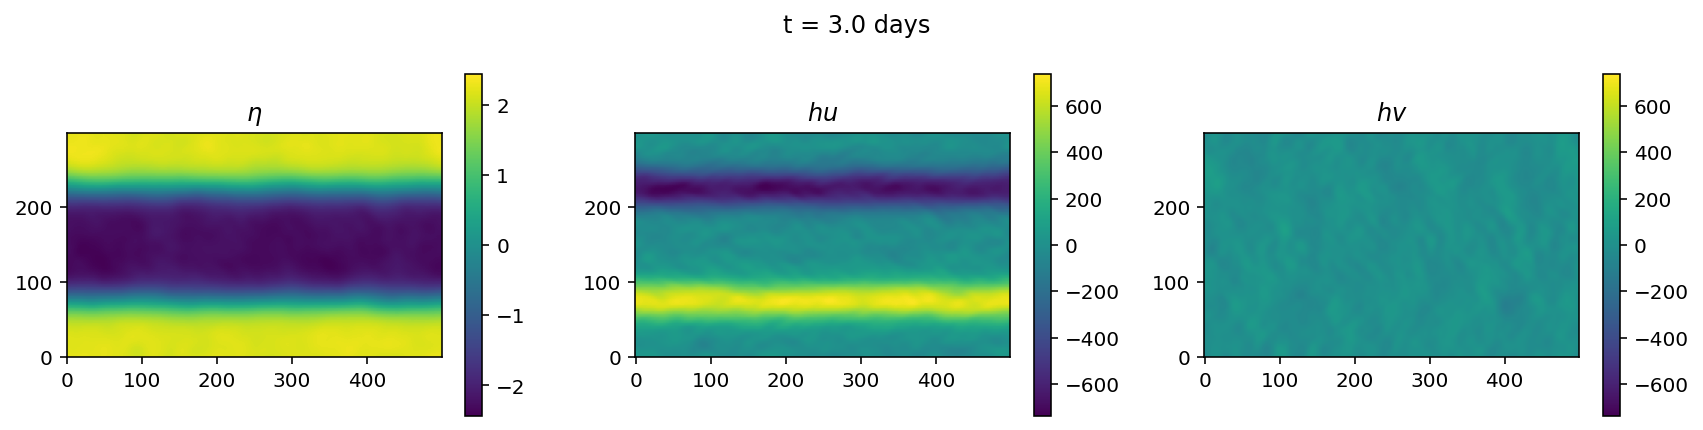

In [11]:
%%time

reload(DoubleJetCase)
three_days = 3*24*60*60
paperCase = DoubleJetCase.DoubleJetCase(gpu_ctx, 
                                        DoubleJetCase.DoubleJetPerturbationType.IEWPFPaperCase, 
                                        model_error=1,
                                        commonSpinUpTime = three_days)
paper_args, paper_init, paper_model_error_args = paperCase.getInitConditions()

paper_sim = CDKLM16.CDKLM16(**paper_args, **paper_init)
paper_sim.setSOARModelError(**paper_model_error_args)

eta, hu, hv = paper_sim.download(interior_domain_only = True)
imshow3(eta, hu, hv, title='t = ' + str(secToDays(paper_sim.t)) + " days")
print("t:", paper_sim.t)
print("In days: " + str(paper_sim.t/(24*60*60)) + " days")
if save: plt.savefig(filename_prefix + "state_t_" + str(int(round(paper_sim.t))) + ".pdf", format='pdf')

In [12]:
print(paper_sim.dt)
print(paper_sim._getMaxTimestepHost())

8.824381277962194
8.790042114257814


t: 432000.0
In days: 5.0 days
Wall time: 19.6 s


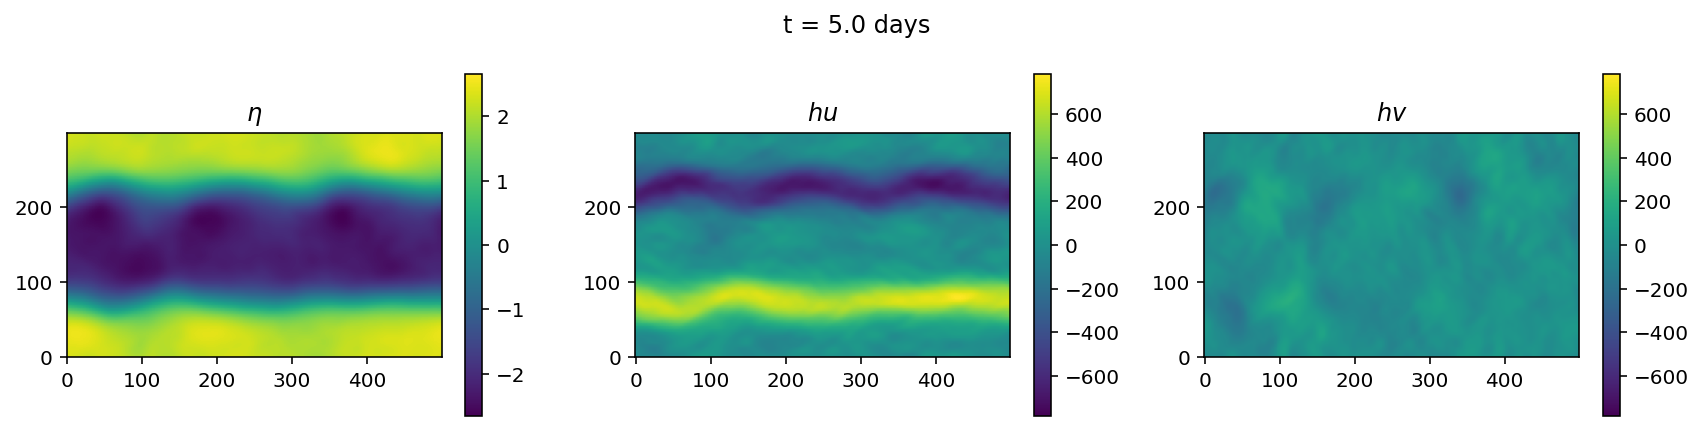

In [13]:
%%time
paper_sim.dataAssimilationStep(daysToSec(5))
eta, hu, hv = paper_sim.download(interior_domain_only = True)
imshow3(eta, hu, hv, title='t = ' + str(secToDays(paper_sim.t)) + " days")
print("t:", paper_sim.t)
print("In days: " + str(paper_sim.t/(24*60*60)) + " days")
if save: plt.savefig(filename_prefix + "state_t_" + str(int(round(paper_sim.t))) + ".pdf", format='pdf')

t: 648000.0
In days: 7.5 days
Wall time: 24.4 s


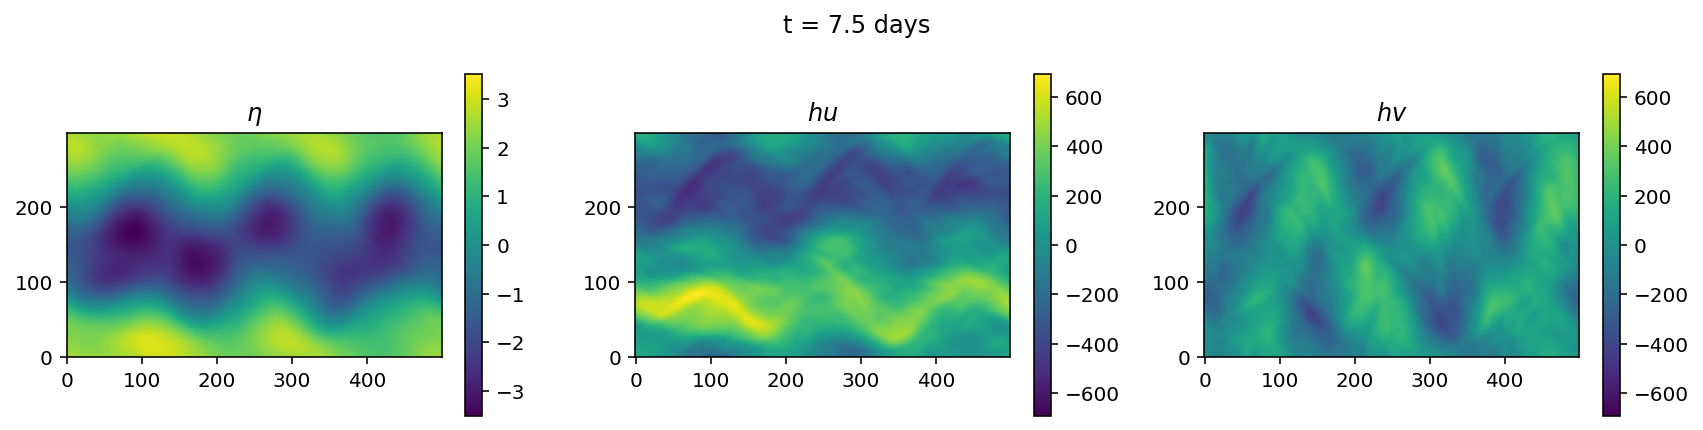

In [14]:
%%time
paper_sim.dataAssimilationStep(daysToSec(7.5))
eta, hu, hv = paper_sim.download(interior_domain_only = True)
imshow3(eta, hu, hv, title='t = ' + str(secToDays(paper_sim.t)) + " days")
print("t:", paper_sim.t)
print("In days: " + str(paper_sim.t/(24*60*60)) + " days")
if save: plt.savefig(filename_prefix + "state_t_" + str(int(round(paper_sim.t))) + ".pdf", format='pdf')

t: 864000.0
In days: 10.0 days
Wall time: 24.4 s


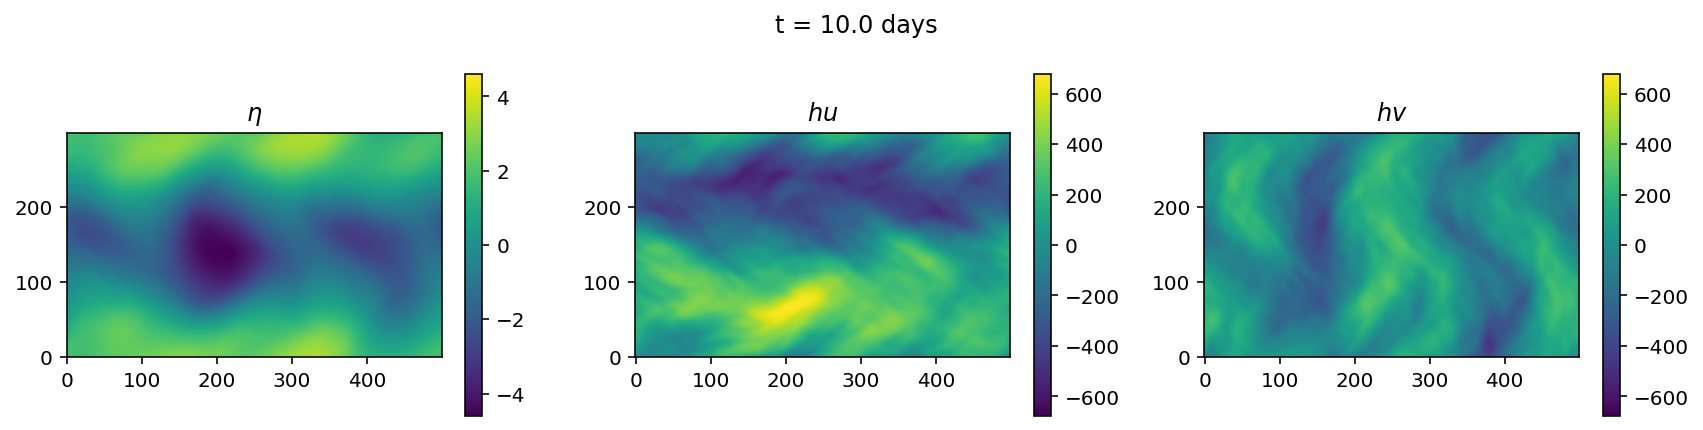

In [15]:
%%time
paper_sim.dataAssimilationStep(daysToSec(10))
eta, hu, hv = paper_sim.download(interior_domain_only = True)
imshow3(eta, hu, hv, title='t = ' + str(secToDays(paper_sim.t)) + " days")
print("t:", paper_sim.t)
print("In days: " + str(paper_sim.t/(24*60*60)) + " days")
if save: plt.savefig(filename_prefix + "state_t_" + str(int(round(paper_sim.t))) + ".pdf", format='pdf')

t: 1123200.0
In days: 13.0 days
Wall time: 29.3 s


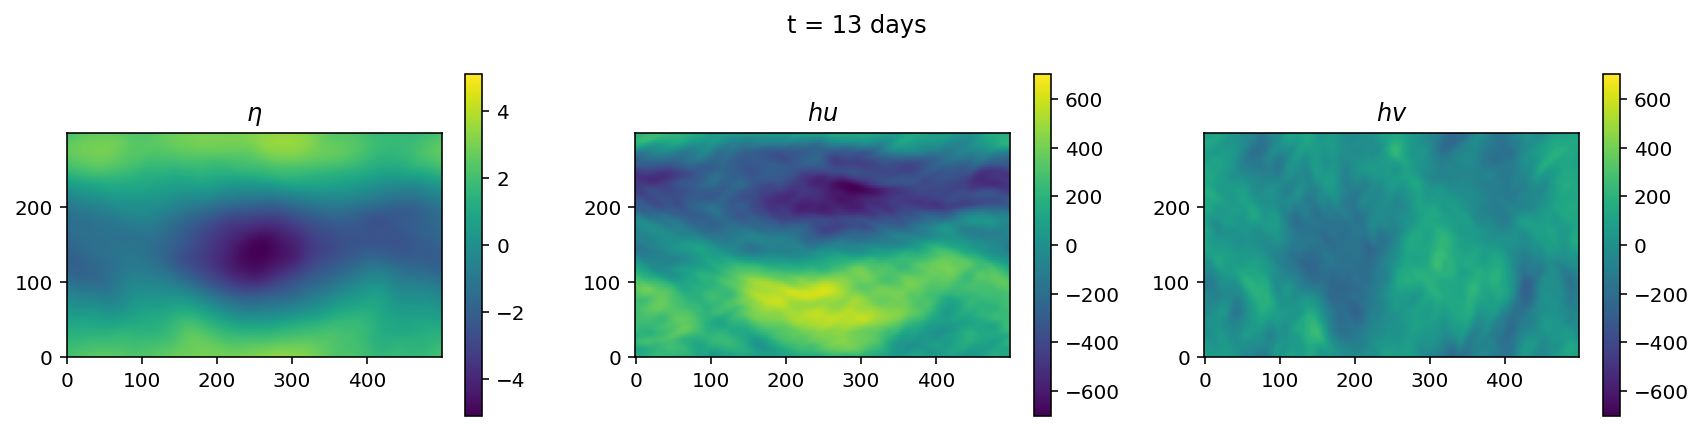

In [16]:
%%time
paper_sim.dataAssimilationStep(daysToSec(13))
eta, hu, hv = paper_sim.download(interior_domain_only = True)
imshow3(eta, hu, hv, 
        title='t = ' + str(round(secToDays(paper_sim.t))) + " days")
print("t:", paper_sim.t)
print("In days: " + str(paper_sim.t/(24*60*60)) + " days")
if save: plt.savefig(filename_prefix + "state_t_" + str(int(round(paper_sim.t))) + ".pdf", format='pdf')

In [ ]:
print(paper_sim.dt)
print(paper_sim._getMaxTimestepHost())

8.862516784667969
8.862516784667969
